In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [470]:
path_to_folder = ''
data = pd.read_csv(path_to_folder + 'Train_v2.csv')
data_vis = pd.read_csv(path_to_folder + 'Train_v2.csv')
data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


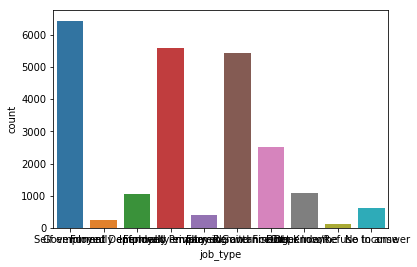

In [423]:
sns.countplot(x='job_type', data=data);

In [424]:
data.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


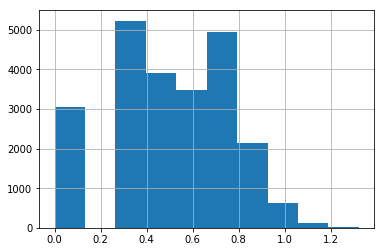

In [474]:
data.household_size.transform(np.log10).hist()

In [0]:
data['household_size'] = data.household_size.transform(np.losqg)
data['age_of_respondent'] = data.age_of_respondent.transform(np.log)

In [426]:
data.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [427]:
data.shape

(23524, 13)

In [428]:
data.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [202]:
for i in data.columns:
    print("{} => {}".format(i, data[i].unique()))

country => ['Kenya' 'Rwanda' 'Tanzania' 'Uganda']
year => ['year_2018' 'year_2016' 'year_2017']
uniqueid => ['uniqueid_1' 'uniqueid_2' 'uniqueid_3' ... 'uniqueid_8757'
 'uniqueid_8758' 'uniqueid_8759']
bank_account => ['Yes' 'No']
location_type => ['Rural' 'Urban']
cellphone_access => ['Yes' 'No']
household_size => [1.09861229 1.60943791 2.07944154 1.94591015 0.         1.79175947
 1.38629436 2.30258509 0.69314718 2.39789527 2.19722458 2.48490665
 2.77258872 2.7080502  2.56494936 2.63905733 3.04452244 2.89037176
 2.83321334 2.99573227]
age_of_respondent => [3.17805383 4.24849524 3.25809654 3.52636052 3.4657359  3.73766962
 3.98898405 4.33073334 3.68887945 4.2341065  4.15888308 3.4339872
 3.63758616 3.8501476  3.29583687 3.87120101 3.21887582 3.04452244
 2.89037176 3.09104245 4.06044301 4.00733319 4.12713439 3.36729583
 3.55534806 3.80666249 4.20469262 2.94443898 4.38202663 4.18965474
 3.91202301 3.49650756 3.33220451 3.93182563 2.77258872 2.83321334
 3.40119738 3.61091791 4.07753744 4.

In [0]:
data['year'] = 'year_' + data['year'].astype(str)

In [0]:
dataset = data.drop(['uniqueid'] , axis = 1)

In [0]:
y = dataset['bank_account'].values
X = dataset.drop(['bank_account'], axis = 1)

In [0]:
X = pd.get_dummies(X, drop_first=True)

In [434]:
X.shape

(23524, 33)

In [0]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [13]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(y), y)
print(class_weights)

[0.58193153 3.5513285 ]


In [0]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 22)

In [0]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(0.3)
x_train, y_train = ros.fit_sample(x_train, y_train)

In [0]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(0.7)
x_train, y_train = rus.fit_sample(x_train, y_train)

In [0]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(ratio='majority')
x_train, y_train = tl.fit_sample(x_train, y_train)

In [0]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')

smote = SMOTE(ratio='minority')
x_train, y_train = smt.fit_sample(x_train, y_train)

In [0]:
from sklearn.preprocessing import StandardScaler
year_scaler= StandardScaler()
house_scaler= StandardScaler()
age_scaler= StandardScaler()

In [0]:
x_train['year'] = year_scaler.fit_transform(x_train['year'].values.reshape(-1, 1))
x_train['household_size'] = house_scaler.fit_transform(x_train['household_size'].values.reshape(-1, 1))
x_train['age_of_respondent'] = age_scaler.fit_transform(x_train['age_of_respondent'].values.reshape(-1, 1))

In [0]:
x_test['year'] = year_scaler.transform(x_test['year'].values.reshape(-1, 1))
x_test['household_size'] = house_scaler.transform(x_test['household_size'].values.reshape(-1, 1))
x_test['age_of_respondent'] = age_scaler.transform(x_test['age_of_respondent'].values.reshape(-1, 1))

In [0]:
# Standerdise the dataset
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [0]:
# making evaluation
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
def evaluate(clf):
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print("The Scores for {} are: Accuracy of {}, F1 of {} and CM".format(type(clf).__name__, accuracy, f1))
    sns.heatmap(cm, annot = True , fmt='g')

In [402]:
# building first model
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(solver = 'lbfgs', max_iter=1000)
clf_lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The Scores for LogisticRegression are: Accuracy of 0.8778690847265515, F1 of 0.5216426193118757 and CM


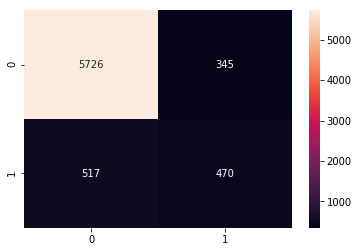

In [403]:
evaluate(clf_lr)

In [404]:
from sklearn.svm import SVC
clf_svm = SVC(kernel = 'rbf', gamma = 'scale')
clf_svm.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

The Scores for SVC are: Accuracy of 0.88169453102862, F1 of 0.5181765724177726 and CM


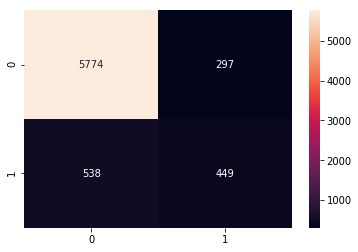

In [405]:
evaluate(clf_svm)

In [407]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors= 10, n_jobs=-1, p=2)
clf_knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
                     weights='uniform')

The Scores for KNeighborsClassifier are: Accuracy of 0.8654009634457354, F1 of 0.48759439050701187 and CM


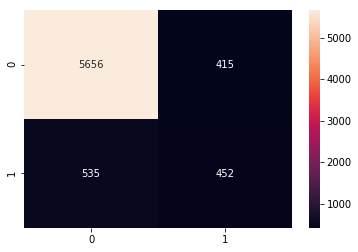

In [408]:
evaluate(clf_knn)

In [366]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

The Scores for DecisionTreeClassifier are: Accuracy of 0.8203457069991499, F1 of 0.3838678328474247 and CM


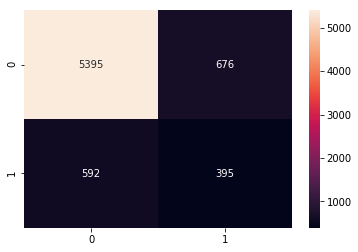

In [367]:
evaluate(clf_dt)

In [368]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators  = 100)
clf_rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

The Scores for RandomForestClassifier are: Accuracy of 0.8466987815245112, F1 of 0.4529828109201213 and CM


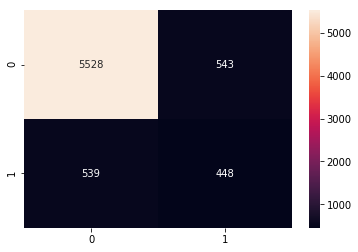

In [369]:
evaluate(clf_rf)

In [370]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
clf_ab = AdaBoostClassifier()
clf_ab.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

The Scores for AdaBoostClassifier are: Accuracy of 0.8576083876452253, F1 of 0.5288326300984529 and CM


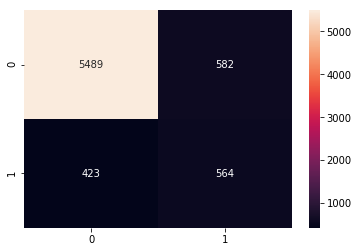

In [371]:
evaluate(clf_ab)

In [372]:
clf_bg = BaggingClassifier()
clf_bg.fit(x_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

The Scores for BaggingClassifier are: Accuracy of 0.8410314536695948, F1 of 0.43276036400404455 and CM


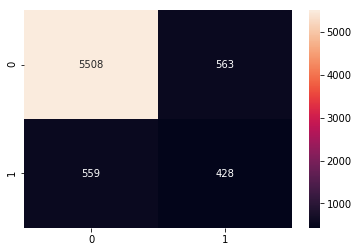

In [373]:
evaluate(clf_bg)

In [316]:
from sklearn.naive_bayes import BernoulliNB
clf_bnb = BernoulliNB()
clf_bnb.fit(x_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

The Scores for BernoulliNB are: Accuracy of 0.8641258146783791, F1 of 0.49124668435013263 and CM


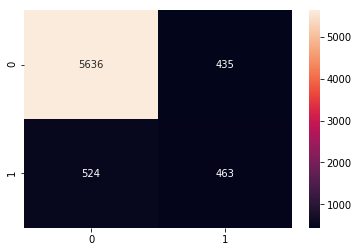

In [317]:
evaluate(clf_bnb)

In [318]:
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB()
clf_gnb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

The Scores for GaussianNB are: Accuracy of 0.8554831396996316, F1 of 0.47906026557711956 and CM


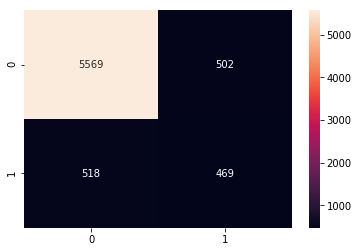

In [319]:
evaluate(clf_gnb)

In [505]:
# building deep neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [511]:
model = Sequential()
model.add(Dense(128 , input_dim = x_train.shape[1], activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               4352      
_________________________________________________________________
dense_10 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_11 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_12 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 513       
Total params: 497,921
Trainable params: 497,921
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss = 'binary_crossentropy' , optimizer = 'rmsprop', metrics = ['accuracy'])

In [513]:
model.fit(x_train, y_train, epochs = 100, batch_size = 64)

Epoch 1/100
18383/18383 [==============================] - 2s 109us/step - loss: 0.3909 - acc: 0.8298
Epoch 2/100
18383/18383 [==============================] - 2s 93us/step - loss: 0.3644 - acc: 0.8450
Epoch 3/100
18383/18383 [==============================] - 2s 94us/step - loss: 0.3546 - acc: 0.8473
Epoch 4/100
18383/18383 [==============================] - 2s 95us/step - loss: 0.3492 - acc: 0.8493
Epoch 5/100
18383/18383 [==============================] - 2s 95us/step - loss: 0.3432 - acc: 0.8531
Epoch 6/100
18383/18383 [==============================] - 2s 94us/step - loss: 0.3396 - acc: 0.8531
Epoch 7/100
18383/18383 [==============================] - 2s 94us/step - loss: 0.3363 - acc: 0.8575
Epoch 8/100
18383/18383 [==============================] - 2s 93us/step - loss: 0.3320 - acc: 0.8582
Epoch 9/100
18383/18383 [==============================] - 2s 94us/step - loss: 0.3292 - acc: 0.8585
Epoch 10/100
18383/18383 [==============================] - 2s 94us/step - loss: 0.3247 - 

In [514]:
model.evaluate(x_test, y_test)

7058/7058 [==============================] - 0s 67us/step


[0.8564944309160033, 0.8574667044657424]

# Testing phase

In [0]:
test = pd.read_csv(path_to_folder+ 'Test_v2.csv')

In [488]:
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [477]:
for i in test.columns:
    print("{} => {}".format(i, test[i].unique()))

country => ['Kenya' 'Rwanda' 'Tanzania' 'Uganda']
year => [2018 2016 2017]
uniqueid => ['uniqueid_6056' 'uniqueid_6060' 'uniqueid_6065' ... 'uniqueid_3000'
 'uniqueid_3001' 'uniqueid_3002']
location_type => ['Urban' 'Rural']
cellphone_access => ['Yes' 'No']
household_size => [ 3  7  6  4  1  5  2  9 10 11  8 12 13 16 15 14 18 20]
age_of_respondent => [ 30  51  77  39  16  25  32  24  22  42  18  20  19  26  35  68  70  34
  95  27  21  45  52  44  75  60  33  36  53  64  66  23  78  38  46  76
  82  41  28  17  50  48  55  37  57  91  87  56  40  59  73  47  74  43
  79  49  58  31  54  63  29  62  90  84  72  65  80  61  67  69  86  85
  71  83  81  93  88  94  89  99  92 100  97]
gender_of_respondent => ['Male' 'Female']
relationship_with_head => ['Head of Household' 'Parent' 'Child' 'Spouse' 'Other relative'
 'Other non-relatives']
marital_status => ['Married/Living together' 'Single/Never Married' 'Divorced/Seperated'
 'Widowed' 'Dont know']
education_level => ['Secondary education

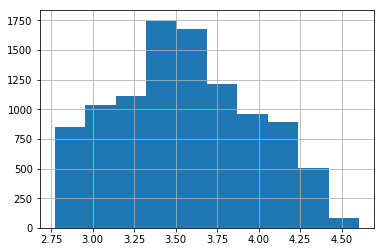

In [489]:
test.age_of_respondent.transform(np.log).hist()

In [0]:
ids = test.uniqueid
country = test.country

In [0]:
test['year'] = 'year_' + test['year'].astype(str)

In [0]:
test['household_size'] = test.household_size.transform(np.log)
test['age_of_respondent'] = test.age_of_respondent.transform(np.log)

In [0]:
dataset_test = test.drop(['uniqueid'], axis = 1)

In [0]:
dataset_test = pd.get_dummies(dataset_test , drop_first=True)

In [495]:
dataset_test.head()

,household_size,age_of_respondent,country_Rwanda,country_Tanzania,country_Uganda,year_year_2017,year_year_2018,location_type_Urban,cellphone_access_Yes,gender_of_respondent_Male,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,1.098612,3.401197,0,0,0,0,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,1.945910,3.931826,0,0,0,0,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2,1.098612,4.343805,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1.791759,3.663562,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,1.098612,2.772589,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [497]:
dataset_test.isnull().sum()

household_size                                     0
age_of_respondent                                  0
country_Rwanda                                     0
country_Tanzania                                   0
country_Uganda                                     0
year_year_2017                                     0
year_year_2018                                     0
location_type_Urban                                0
cellphone_access_Yes                               0
gender_of_respondent_Male                          0
relationship_with_head_Head of Household           0
relationship_with_head_Other non-relatives         0
relationship_with_head_Other relative              0
relationship_with_head_Parent                      0
relationship_with_head_Spouse                      0
marital_status_Dont know                           0
marital_status_Married/Living together             0
marital_status_Single/Never Married                0
marital_status_Widowed                        

In [0]:
dataset_test = scaler.transform(dataset_test)

In [0]:
prediction = clf_svm.predict(dataset_test)

In [0]:
new_id = ids + " x " + country

In [0]:
list_of_tuples = list(zip(new_id, prediction)) 


In [0]:
result = pd.DataFrame(list_of_tuples, columns = ['uniqueid' , 'bank_account'])

In [503]:
result.head()

,uniqueid,bank_account
0,uniqueid_6056 x Kenya,1
1,uniqueid_6060 x Kenya,1
2,uniqueid_6065 x Kenya,0
3,uniqueid_6072 x Kenya,0
4,uniqueid_6073 x Kenya,0


In [0]:
result.to_csv('submission_file_2.csv' ,index = False)